In [15]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#read the data 
df = pd.read_csv("../data/netflix.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [17]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [18]:
#change date column to datetime type
df['date_added'] = pd.to_datetime(df['date_added'])

In [19]:
#check for value mismatch and quality 
#replace not given with Unknown
df["country"] = df["country"].replace("Not Given", "Unknown")
df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Unknown', 'China', 'South Africa', 'Japan',
       'Nigeria', 'Spain', 'Philippines', 'Australia', 'Argentina',
       'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia',
       'Mexico', 'Belgium', 'Switzerland', 'Taiwan', 'Bulgaria', 'Poland',
       'South Korea', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Kuwait',
       'Malaysia', 'Vietnam', 'Lebanon', 'Romania', 'Syria',
       'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey',
       'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland', 'Russia',
       'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal', 'Hungary',
       'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia', 'Peru',
       'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland', 'Denmark',
       'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union', 'Greece',
       'West Germany', 'Iran', 'Venezuela', 'Slovenia', 'Guatemala',


Text(0, 0.5, 'Content Count')

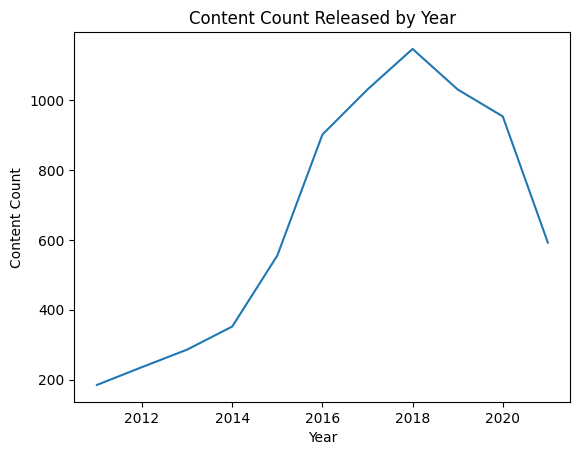

In [20]:
#Year with the most content released from 2010
count = (df[df['release_year'] > 2010]['release_year'].value_counts().sort_index())
sns.lineplot(x = count.index, y = count.values)
plt.title('Content Count Released by Year')
plt.xlabel('Year')
plt.ylabel('Content Count')

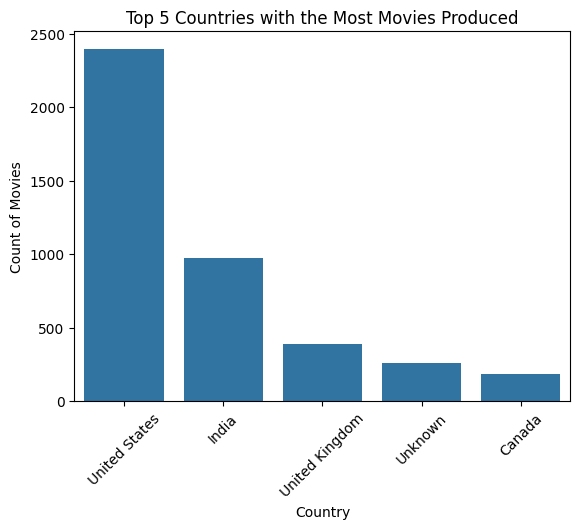

In [21]:
# what country produced the most movies/series
most_movies = df[df['type'] == 'Movie']
top_countries = most_movies['country'].value_counts().head(5)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 5 Countries with the Most Movies Produced")
plt.xlabel("Country")
plt.ylabel("Count of Movies")
plt.xticks(rotation=45) 
plt.show()

/var/folders/mg/3zw76pqj4bq6b23l78jlbz8w0000gn/T/ipykernel_25226/840580577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Greens_r")


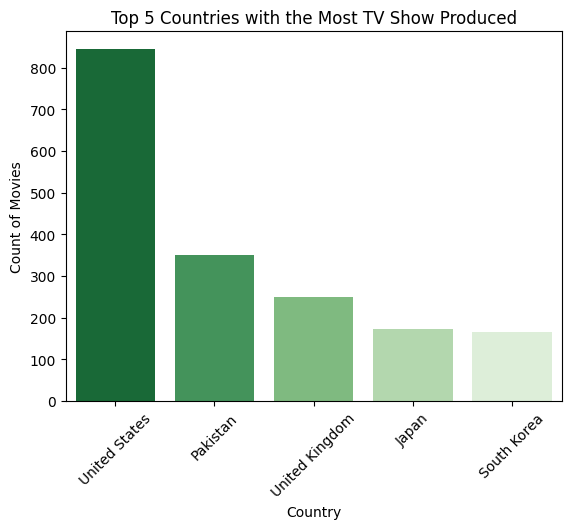

In [22]:
#Top 5 with the Most TV shows produced
most_shows = df[df["type"] == "TV Show"]
top_countries = most_shows["country"].value_counts().head(5)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Greens_r")
plt.title("Top 5 Countries with the Most TV Show Produced")
plt.xlabel("Country")
plt.ylabel("Count of Movies")
plt.xticks(rotation=45)
plt.show()

/var/folders/mg/3zw76pqj4bq6b23l78jlbz8w0000gn/T/ipykernel_25226/3465736779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_countries.index, y=top5_countries.values, palette="Reds_r")


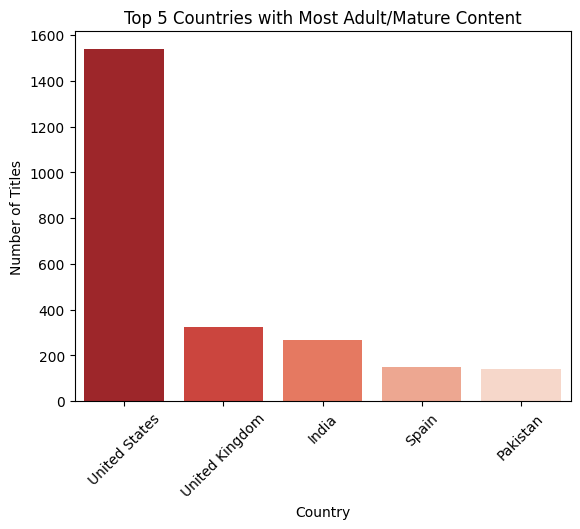

In [23]:
#which counties produced the highest rated content
df.rating.unique()
rated_content = df[df["rating"].isin(["R", "NC-17", "TV-MA"])]
country_counts = rated_content.groupby("country").size().sort_values(ascending=False)
top5_countries = country_counts.head(5)
sns.barplot(x=top5_countries.index, y=top5_countries.values, palette="Reds_r")
plt.title("Top 5 Countries with Most Adult/Mature Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

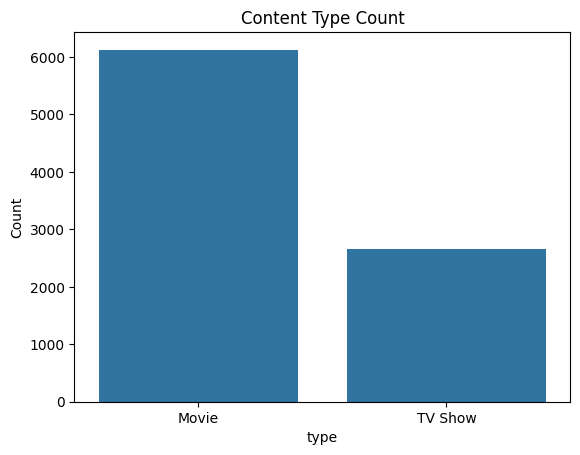

In [24]:
#distribution of content produced
count_content = df['type'].value_counts()
sns.barplot(x = count_content.index , y = count_content.values)
plt.title('Content Type Count')
plt.ylabel('Count')